In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic = pd.read_csv("https://raw.githubusercontent.com/ppnp-remoto/14-datasets/master/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Perguntas:
*  Quantas pessoas tinham mais de 50 anos ?
*  Quantas pessoas menores de idade ?
*  Sobreviventes por sexo







In [ ]:
titanic[ titanic.Age > 50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
...,...,...,...,...,...,...,...,...,...,...,...,...
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S


Como fazer a contagem de informaçoes em uma coluna

In [ ]:
cinquentaMais = titanic.query("Age >= 50")
#cinquentaMais.head()
cinquentaMais.PassengerId.count()


74

In [ ]:
titanic[ titanic.Age < 18]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


In [ ]:
maioresdeidade = titanic.query(" Age < 18 ")
maioresdeidade.PassengerId.count()

113

In [ ]:
print(f"Sobreviveram  {titanic[  (titanic.Age < 18) & (titanic.Survived == 1)].shape[0]} pessoas menores de idade abordo do titanic")

Sobreviveram  61 pessoas menores de idade abordo do titanic


Como receber a quantidade de sobriventes por sexo e tambem como mudar o nome das colunas

In [ ]:
qtd_50mais = cinquentaMais[ ['Sex', 'PassengerId'] ].groupby('Sex', as_index=False).count()
#qtd_50mais_Feminino.head()
qtd_50mais.rename( columns={'PassengerId' : 'Quantidade'}, inplace = True)
qtd_50mais

,Sex,Quantidade
0,female,22
1,male,52


Como fazer um Grafico com a base de dados

<Axes: xlabel='Sex', ylabel='Quantidade'>

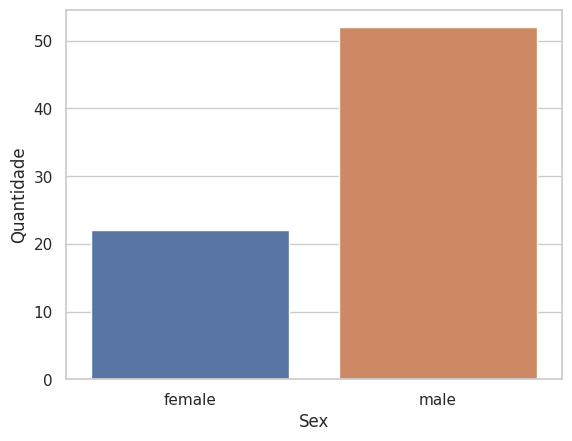

In [ ]:
sns.set( style = 'whitegrid')
sns.barplot( x='Sex', y='Quantidade', hue = 'Sex', data= qtd_50mais)


Quais os sobreviventes por PClass, gerar grafico d sobreviventes


In [ ]:
titanic[ titanic.Survived == 1].Pclass.value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [ ]:
sobreviventes = titanic.query('Survived == 1')

sobreviventes_porclasse = sobreviventes[ [ 'Pclass', 'PassengerId']  ].groupby('Pclass', as_index=False).count()
sobreviventes_porclasse

,Pclass,PassengerId
0,1,136
1,2,87
2,3,119


from matplotlib import pyplot as plt
sobreviventes_porclasse['Pclass'].plot(kind='hist', bins=20, title='Pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sobreviventes_porclasse['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sobreviventes_porclasse.plot(kind='scatter', x='Pclass', y='PassengerId', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Pclass']
  ys = series['PassengerId']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sobreviventes_porclasse.sort_values('Pclass', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Pclass')
_ = plt.ylabel('PassengerId')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Pclass']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Pclass'}, axis=1)
              .sort_values('Pclass', ascending=True))
  xs = counted['Pclass']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sobreviventes_porclasse.sort_values('Pclass', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Pclass')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
sobreviventes_porclasse['Pclass'].plot(kind='line', figsize=(8, 4), title='Pclass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sobreviventes_porclasse['PassengerId'].plot(kind='line', figsize=(8, 4), title='PassengerId')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='Pclass', ylabel='PassengerId'>

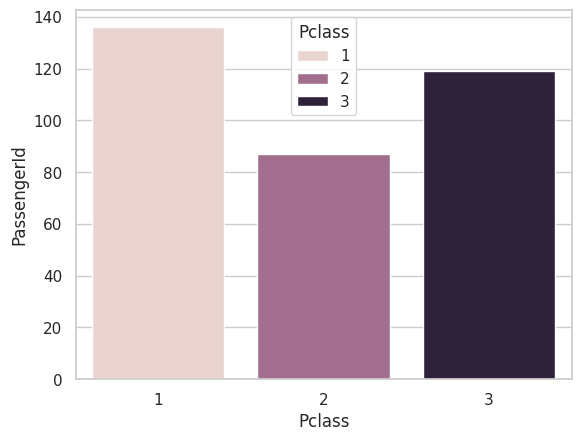

In [ ]:
#sns.set( style = 'whitegrid')
sns.barplot( x='Pclass', y='PassengerId', hue = 'Pclass', data= sobreviventes_porclasse)